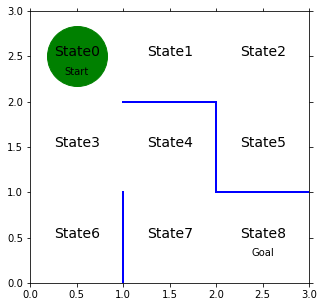

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(5, 5))
ax = plt.gca()

plt.plot([1, 1], [0, 1], color='blue', linewidth=2)
plt.plot([1, 2], [2, 2], color='blue', linewidth=2)
plt.plot([2, 2], [2, 1], color='blue', linewidth=2)
plt.plot([2, 3], [1, 1], color='blue', linewidth=2)

plt.text(0.5, 2.5, 'State0', size=14, ha='center')
plt.text(1.5, 2.5, 'State1', size=14, ha='center')
plt.text(2.5, 2.5, 'State2', size=14, ha='center')
plt.text(0.5, 1.5, 'State3', size=14, ha='center')
plt.text(1.5, 1.5, 'State4', size=14, ha='center')
plt.text(2.5, 1.5, 'State5', size=14, ha='center')
plt.text(0.5, 0.5, 'State6', size=14, ha='center')
plt.text(1.5, 0.5, 'State7', size=14, ha='center')
plt.text(2.5, 0.5, 'State8', size=14, ha='center')
plt.text(0.5, 2.3, 'Start', ha='center')
plt.text(2.5, 0.3, 'Goal', ha='center')

ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='off', right='off', left='off', labelleft='off')

line, = ax.plot([0.5], [2.5], marker="o", color='g', markersize=60)

In [2]:
theta_0 = np.array([[np.nan, 1, 1, np.nan],  # 0
                    [np.nan, 1, np.nan, 1],  # 1
                    [np.nan, np.nan, 1, 1],  # 2
                    [1, 1, 1, np.nan],  # 3
                    [np.nan, np.nan, 1, 1],  # 4
                    [1, np.nan, np.nan, np.nan],  # 5
                    [1, np.nan, np.nan, np.nan],  # 6
                    [1, 1, np.nan, np.nan],  # 7
                    ])

In [3]:
def simple_convert_into_pi_from_theta(theta):
    [m, n] = theta.shape  
    pi = np.zeros((m, n))
    for i in range(0, m):
        pi[i, :] = theta[i, :] / np.nansum(theta[i, :])  
    pi = np.nan_to_num(pi) 
    return pi

In [4]:
pi_0 = simple_convert_into_pi_from_theta(theta_0)


In [5]:
pi_0

array([[0.        , 0.5       , 0.5       , 0.        ],
       [0.        , 0.5       , 0.        , 0.5       ],
       [0.        , 0.        , 0.5       , 0.5       ],
       [0.33333333, 0.33333333, 0.33333333, 0.        ],
       [0.        , 0.        , 0.5       , 0.5       ],
       [1.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [0.5       , 0.5       , 0.        , 0.        ]])

In [6]:
def get_next_s(pi, s):
    direction = ["up", "right", "down", "left"]

    next_direction = np.random.choice(direction, p=pi[s, :])

    if next_direction == "up":
        s_next = s - 3 
    elif next_direction == "right":
        s_next = s + 1 
    elif next_direction == "down":
        s_next = s + 3  
    elif next_direction == "left":
        s_next = s - 1 

    return s_next

In [7]:
def goal_maze(pi):
    s = 0 
    state_history = [0]  

    while (1):  
        next_s = get_next_s(pi, s)
        state_history.append(next_s)  

        if next_s == 8:  
            break
        else:
            s = next_s

    return state_history

In [8]:
state_history = goal_maze(pi_0)


In [9]:
print(state_history)
print(str(len(state_history) - 1))

[0, 1, 0, 1, 2, 1, 0, 3, 0, 3, 4, 3, 6, 3, 0, 1, 0, 1, 2, 5, 2, 5, 2, 1, 0, 1, 2, 5, 2, 1, 2, 5, 2, 5, 2, 5, 2, 1, 2, 5, 2, 1, 0, 3, 0, 3, 0, 1, 0, 1, 0, 3, 4, 7, 8]
54


In [10]:
from matplotlib import animation
from IPython.display import HTML


def init():
    line.set_data([], [])
    return (line,)


def animate(i):
    state = state_history[i]  
    x = (state % 3) + 0.5  
    y = 2.5 - int(state / 3) 
    line.set_data(x, y)
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(
    state_history), interval=200, repeat=False)

HTML(anim.to_jshtml())
